In [43]:
from ipywidgets import interact, interactive, fixed, interact_manual
import seaborn
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gamma
seaborn.set_context("talk", font_scale=1.5)
seaborn.set_style("whitegrid")

In [44]:
def dirichlet_partition(alphas):
    return gamma(alphas.sum()) / gamma(alphas).prod()

In [51]:
def beta_pdf(theta, alpha_0, alpha_1):
    return gamma(alpha_0 + alpha_1) / (gamma(alpha_0) * gamma(alpha_1))* \
        (theta ** (alpha_1 -1)) * ( (1 - theta) ** (alpha_0-1)) 

In [52]:
def dirichlet_pdf(thetas, alphas):
    return dirichlet_partition(alphas) * \
         np.product([t ** (a-1) for t, a in zip(thetas, alphas)], axis=0)

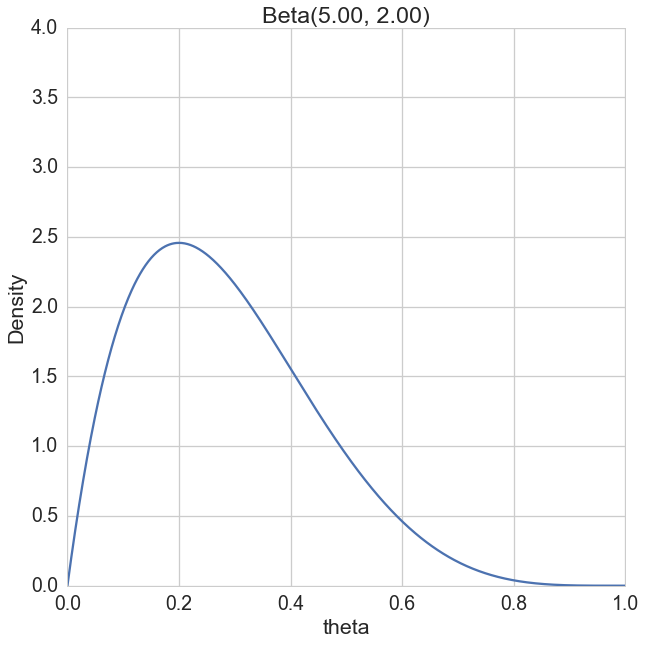

In [59]:
%matplotlib inline
eps = 1e-5
def plot(alpha_0=1.0, alpha_1=1.0):
    plt.figure(figsize=(10,10))
    theta = np.linspace(0+eps, 1-eps, 1000)
    f = plt.plot(theta, beta_pdf(theta, alpha_0, alpha_1))
    plt.title("Beta(%2.2f, %2.2f)"%(alpha_0, alpha_1))
    plt.ylabel("Density")
    plt.xlabel("theta")
    plt.ylim(0, 4)
    plt.show()
plot(5, 2)

In [54]:
interactive(plot, alpha_0=(0.0+eps, 5.0), alpha_1=(0.0+eps, 5.0))


A Jupyter Widget

<IPython.core.display.Javascript object>


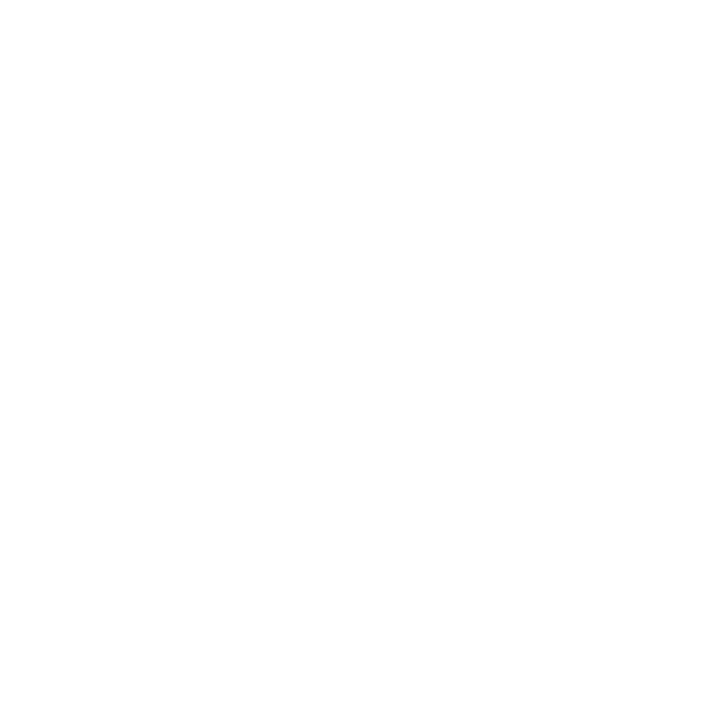

A Jupyter Widget

<IPython.core.display.Javascript object>


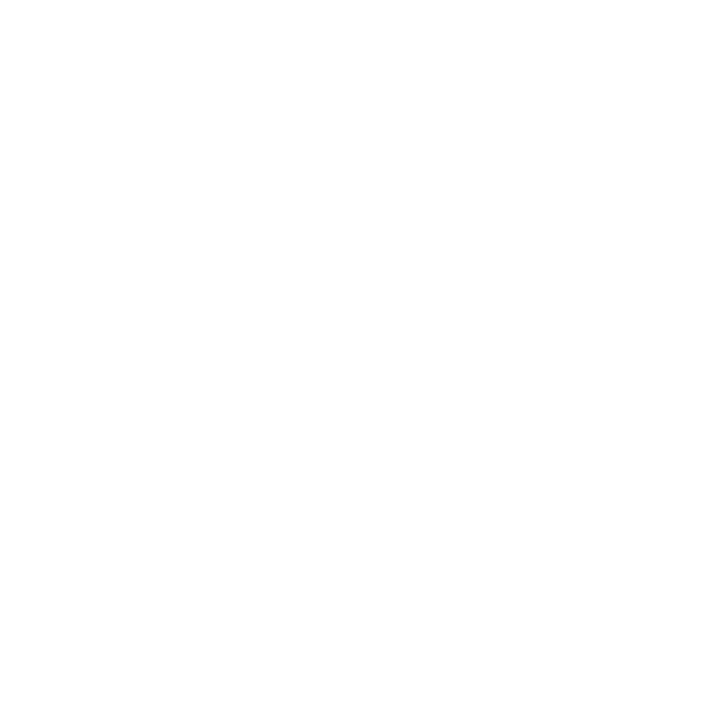

In [63]:
%matplotlib notebook

eps = 1e-5
from mpl_toolkits.mplot3d import Axes3D
#%mplot3d inline
fig = plt.figure(figsize=(10,10))
plt.clf()
ax = fig.add_subplot(111, projection='3d')
def plot(alpha_1=1.0, alpha_2=1.0, alpha_3=1.0):
    ax.clear()
    #ax.set_figure(figsize=(10,10))
    theta1 = np.linspace(0+eps, 1-eps, 50)
    theta2 = np.linspace(0+eps, 1-eps, 50)
    theta1, theta2 = np.meshgrid(theta1, theta2)
    theta3 = 1.0 - theta1 - theta2
    null = theta3 <= eps
    theta1[null] = eps
    theta2[null] = eps
    theta3[null] = eps
    Z = dirichlet_pdf(np.array([theta1, theta2, theta3]), 
                      np.array([alpha_1, alpha_2, alpha_3]))
    Z = np.ma.masked_array(Z, theta3 > eps)
    f = ax.plot_surface(theta1, theta2, Z, cmap="jet")
    ax.scatter(theta1, theta2)
    ax.set_title("Dirichlet(%2.2f, %2.2f, %2.2f)"%(alpha_1, alpha_2, alpha_3))
    ax.set_zlim([0, 10])
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_xlabel("theta_1")
    ax.set_ylabel("theta_2")
    ax.set_zlabel("density")

interactive(plot, alpha_1=(0.0+eps, 5.0), alpha_2=(0.0+eps, 5.0), alpha_3=(0.0+eps, 5.0))